![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [15]:
# Start coding here
# Use as many cells as you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sleep=pd.read_csv('sleep_health_data.csv')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
sleep.shape

(374, 13)

In [4]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
sleep.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [7]:
sleep.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 3
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [8]:
sleep.duplicated().sum()

0

In [9]:
sleep.isnull().sum()/len(sleep) *100

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [13]:
cat_cols=sleep.select_dtypes(include=['object']).columns
num_cols = sleep.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')
Numerical Variables:
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


Person ID
Skew : 0.0
Variance: 11687.5


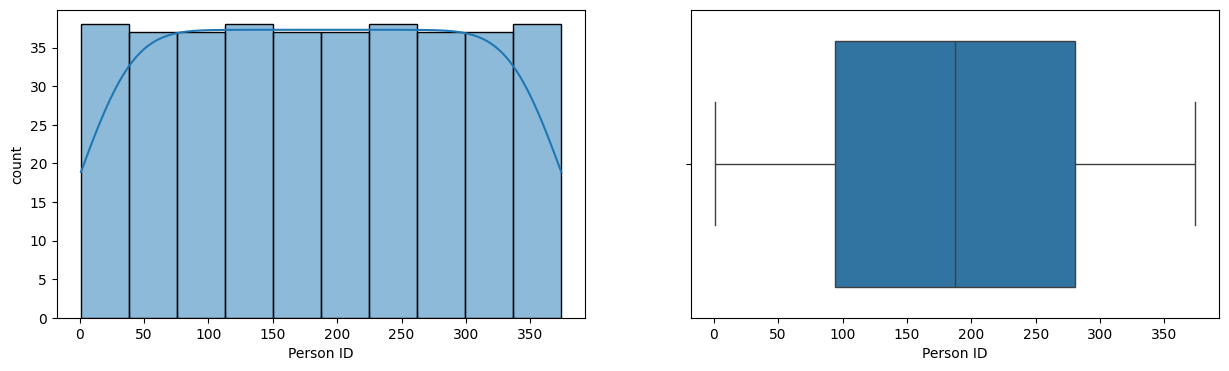

Age
Skew : 0.26
Variance: 75.22


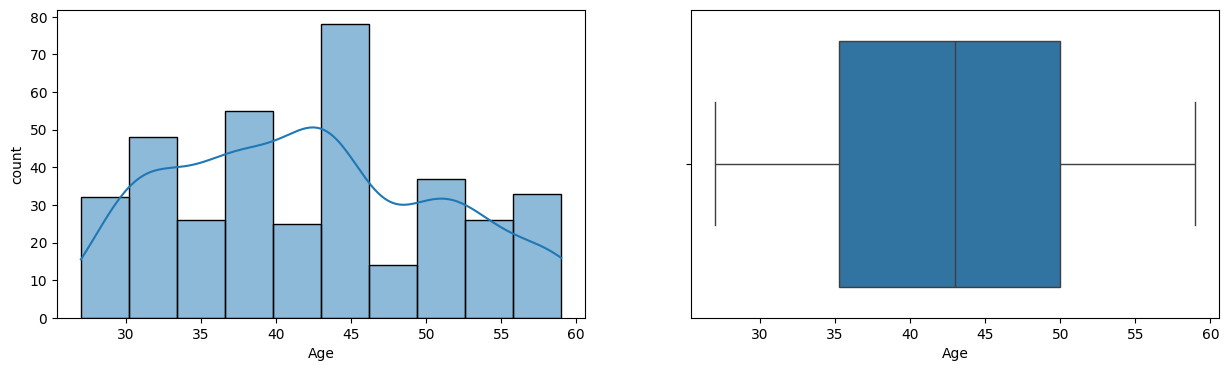

Sleep Duration
Skew : 0.04
Variance: 0.63


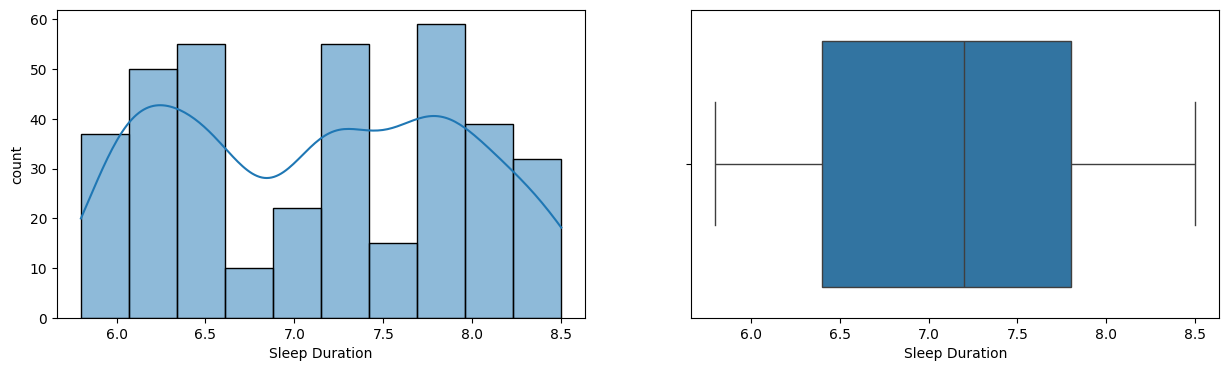

Quality of Sleep
Skew : -0.21
Variance: 1.43


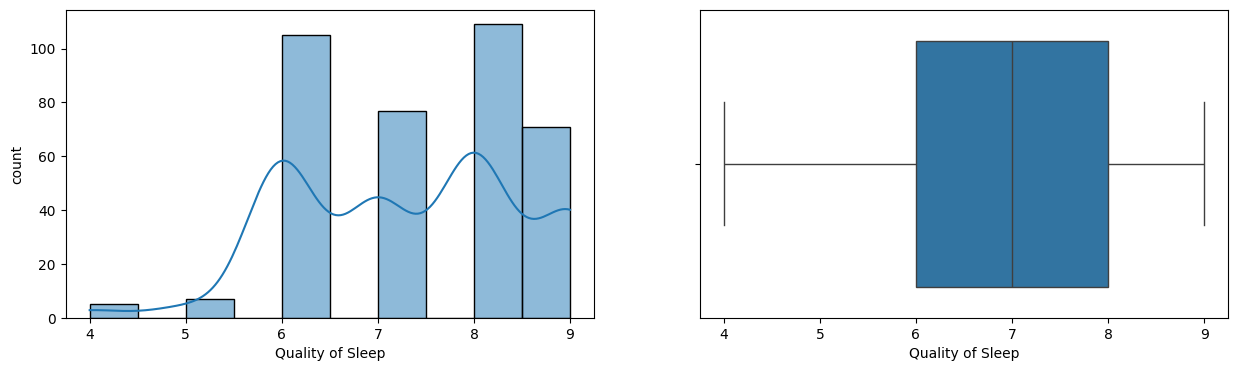

Physical Activity Level
Skew : 0.07
Variance: 433.92


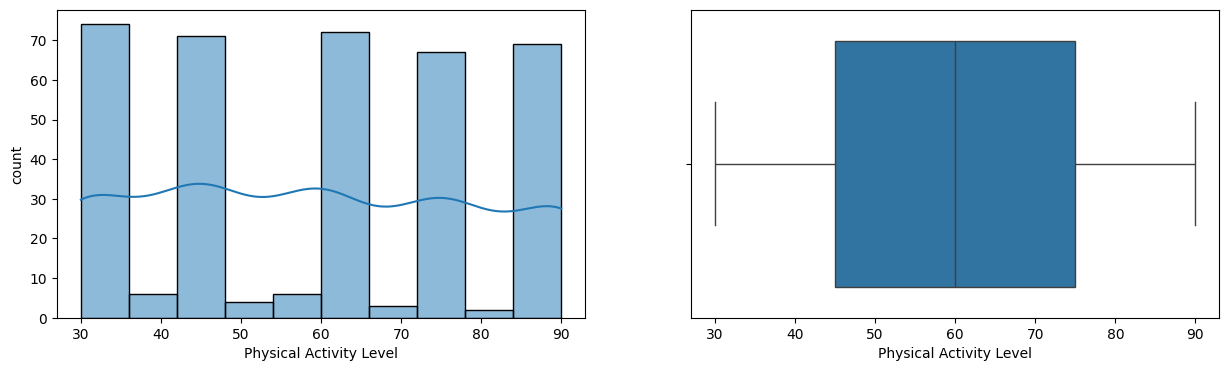

Stress Level
Skew : 0.15
Variance: 3.15


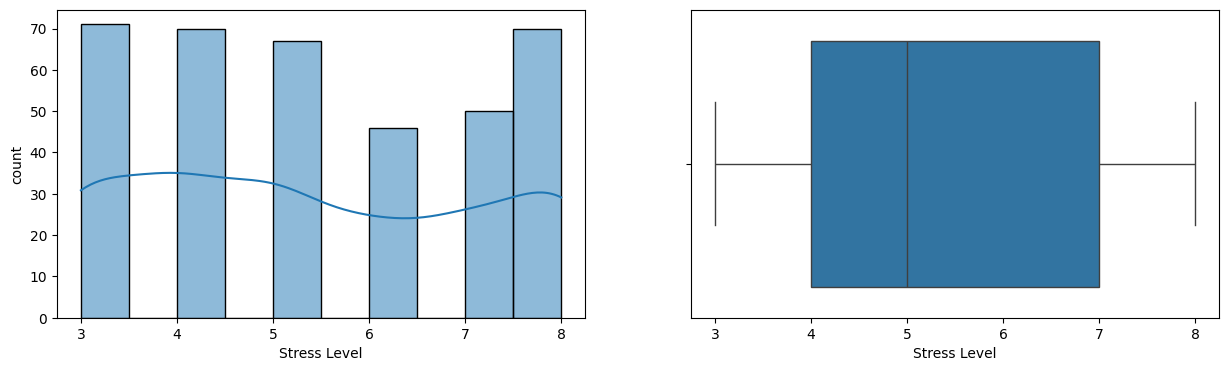

Heart Rate
Skew : 1.22
Variance: 17.1


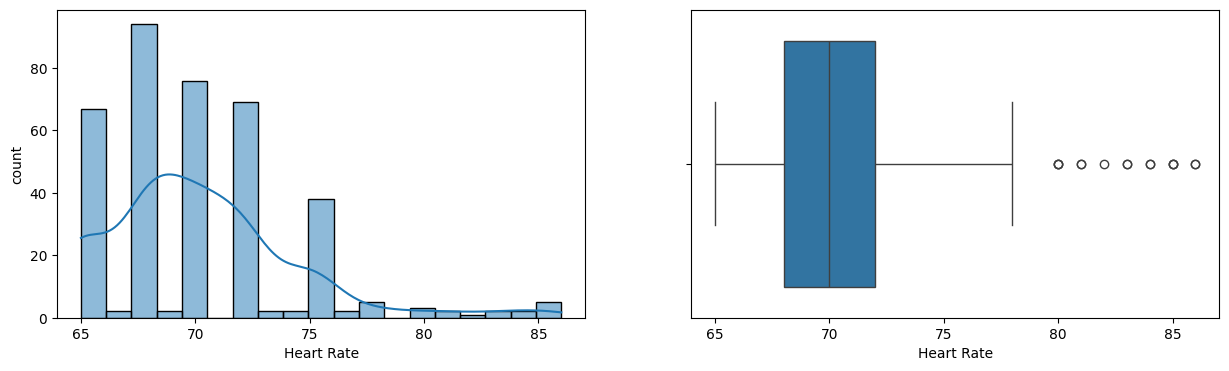

Daily Steps
Skew : 0.18
Variance: 2617651.14


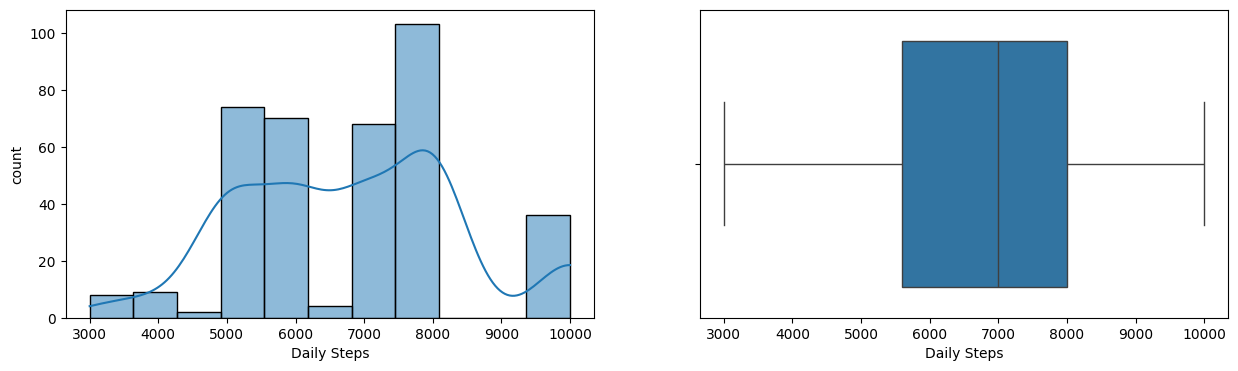

In [23]:
for col in num_cols:
    print(col)
    print('Skew :', round(sleep[col].skew(), 2))
    print('Variance:',round(sleep[col].var(),2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(sleep[col], kde =True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=sleep[col])
    plt.show()


Gender : No. of unique values 2


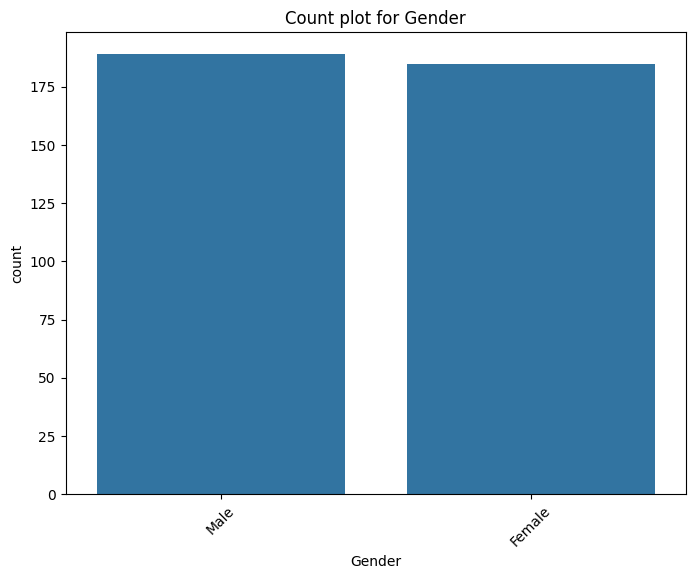

Occupation : No. of unique values 11


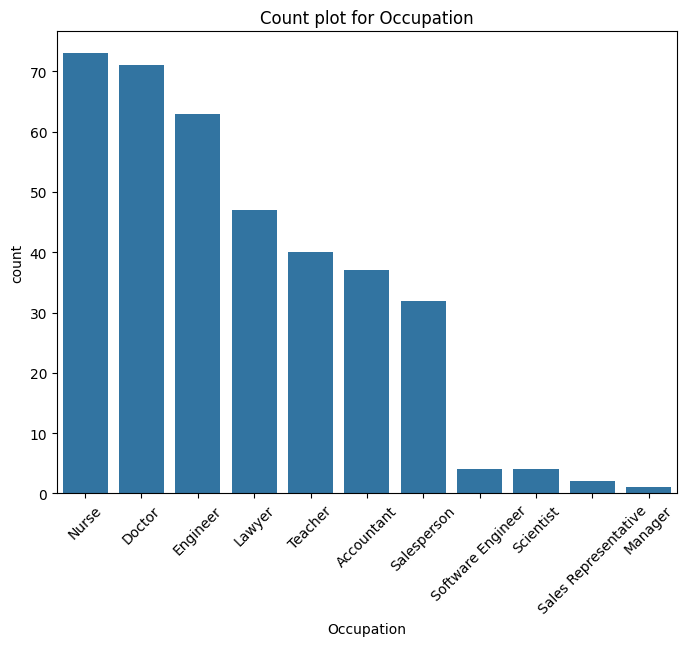

BMI Category : No. of unique values 3


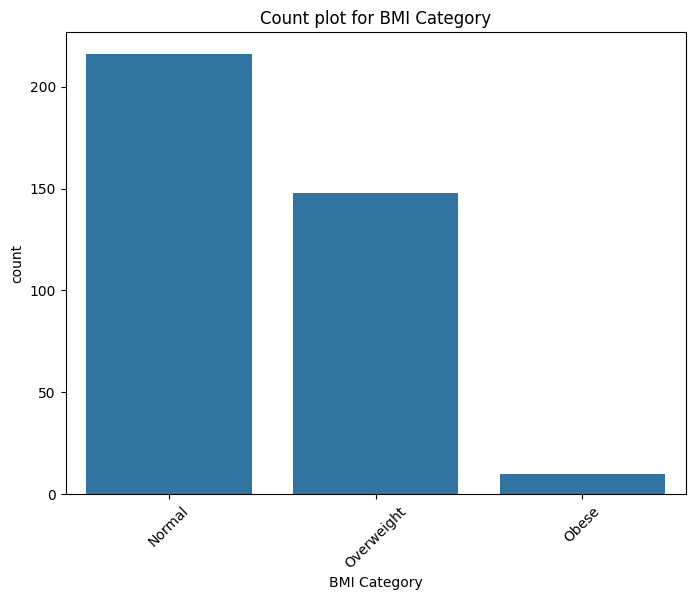

Blood Pressure : No. of unique values 25


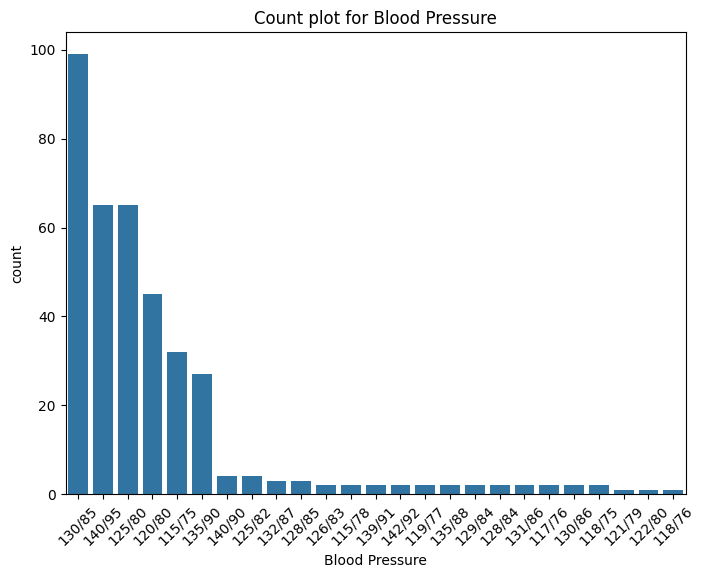

Sleep Disorder : No. of unique values 3


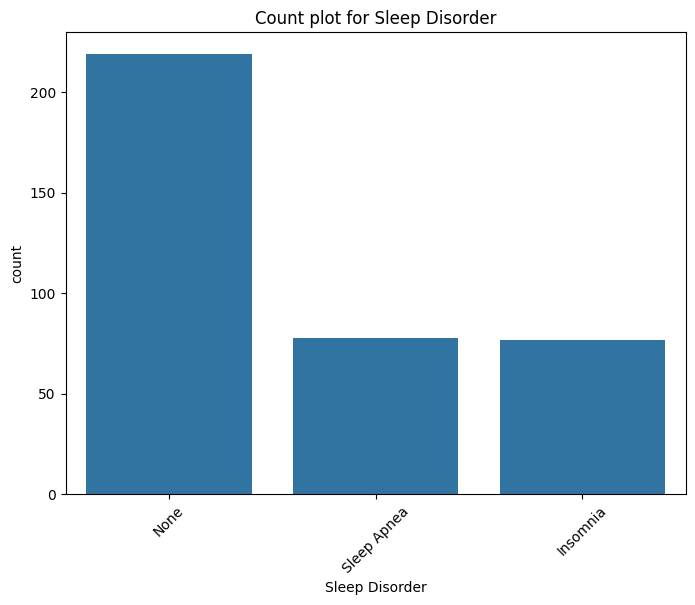

In [31]:

for col in cat_cols:
    fig, ax = plt.subplots(figsize=(8, 6))
    print(col,': No. of unique values', sleep[col].nunique())
    sns.countplot(x=col, data=sleep, order=sleep[col].value_counts().index)
    ax.set_title(f'Count plot for {col}')
    plt.xticks(rotation=45)
    plt.show()


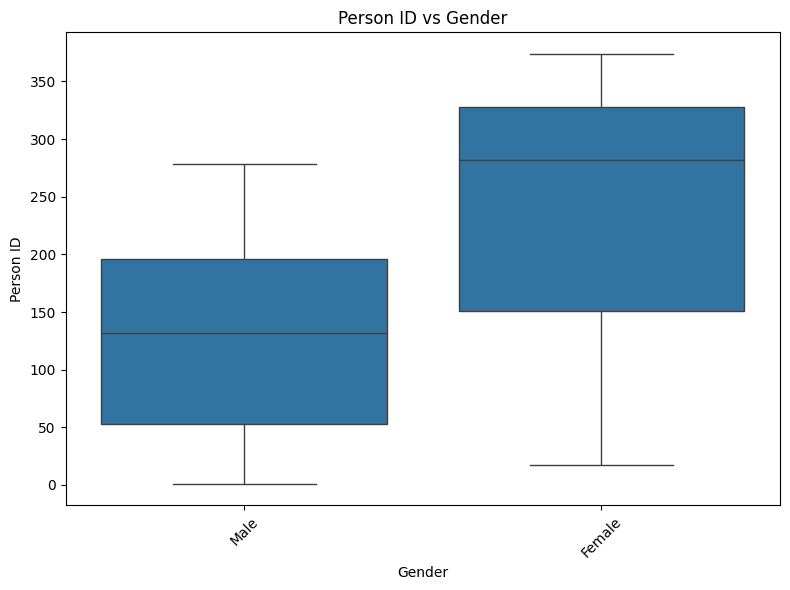

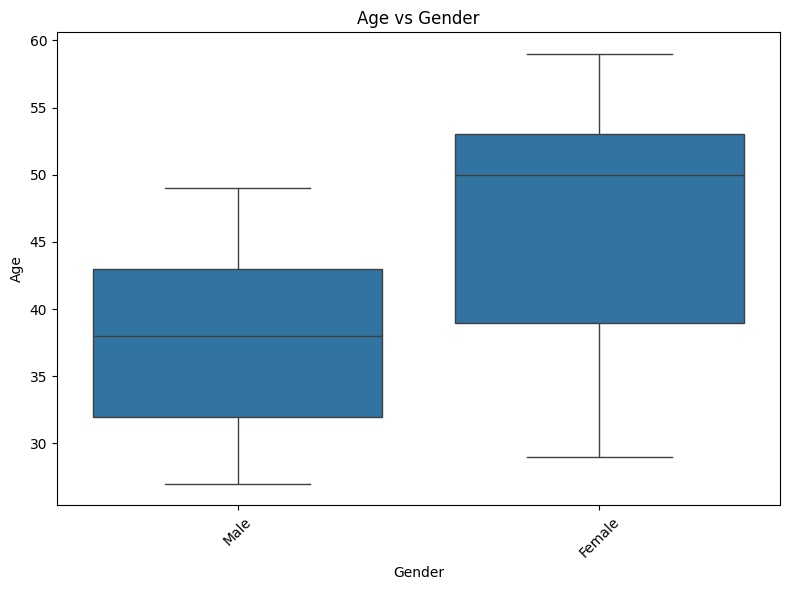

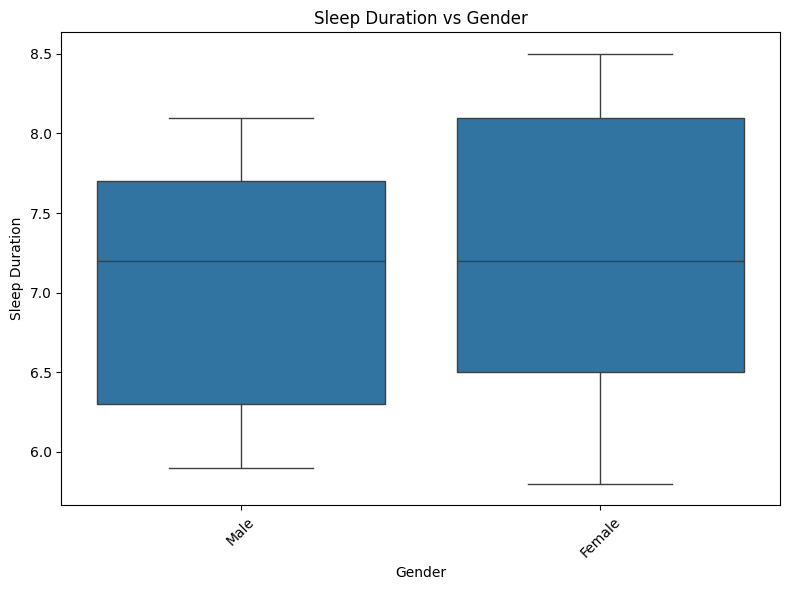

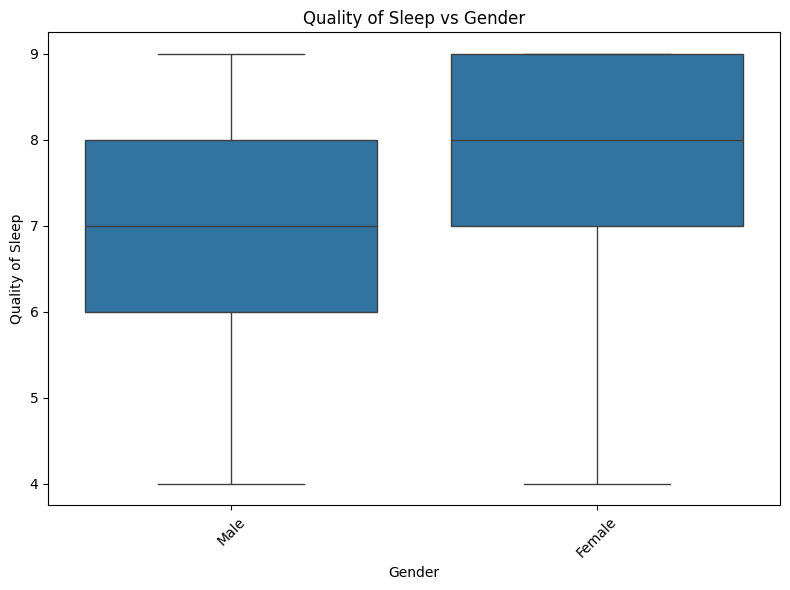

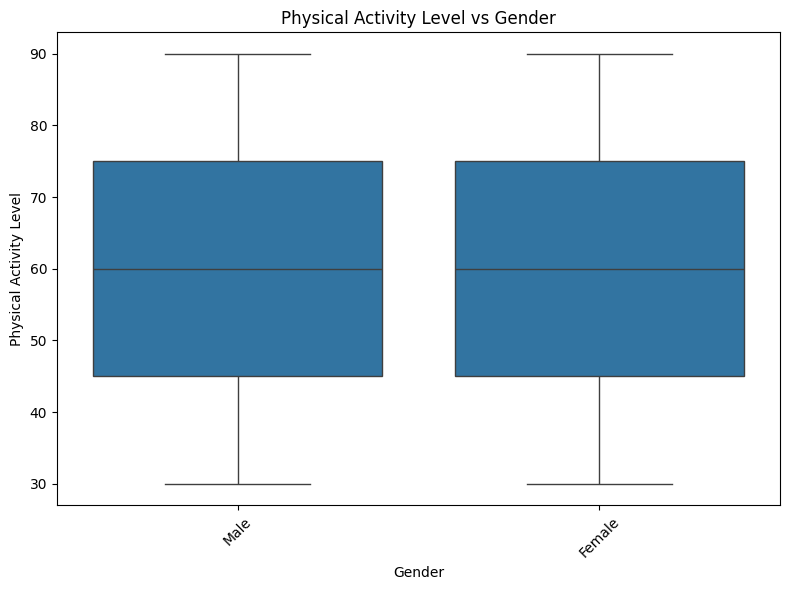

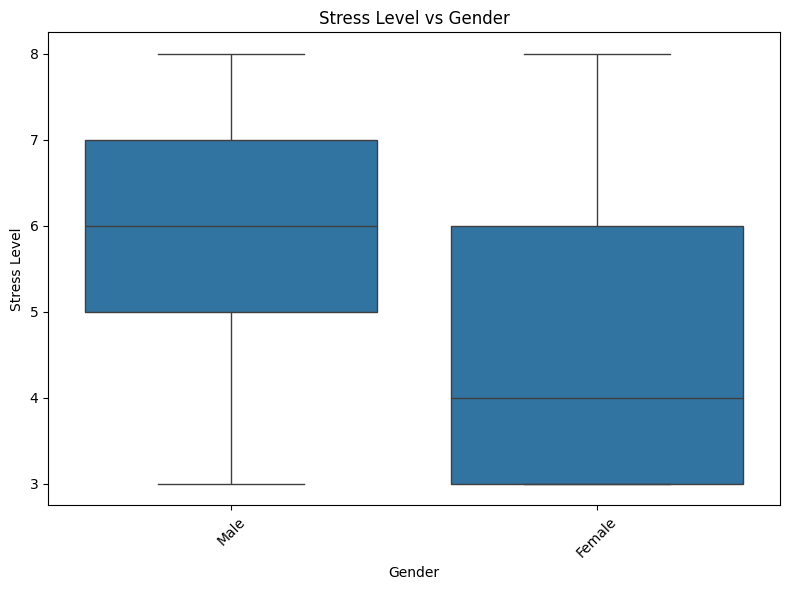

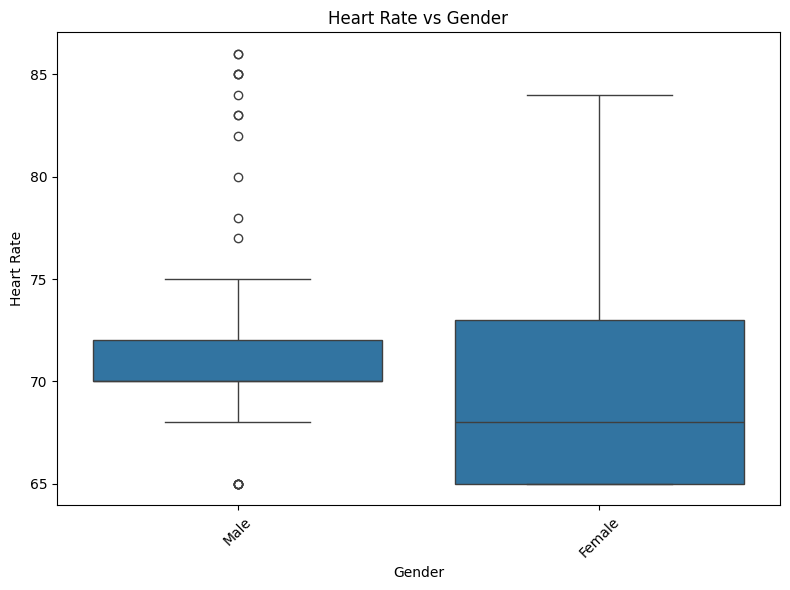

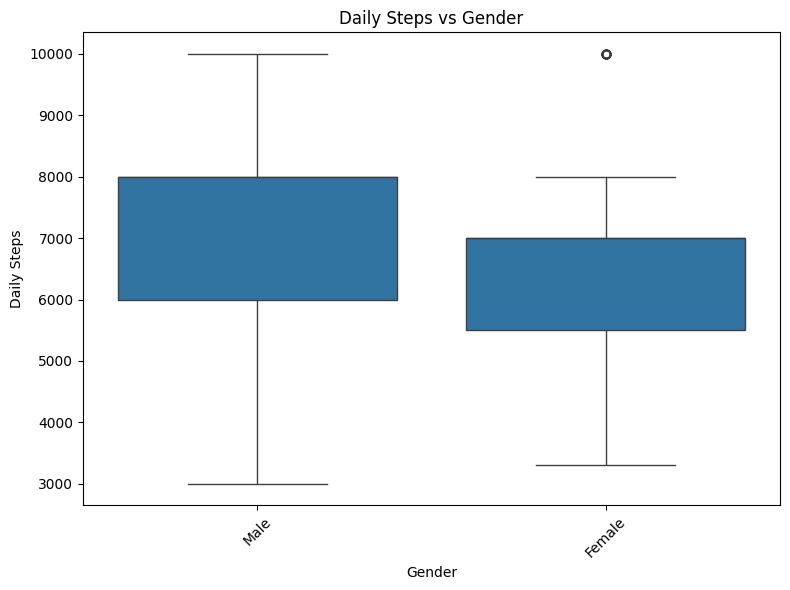

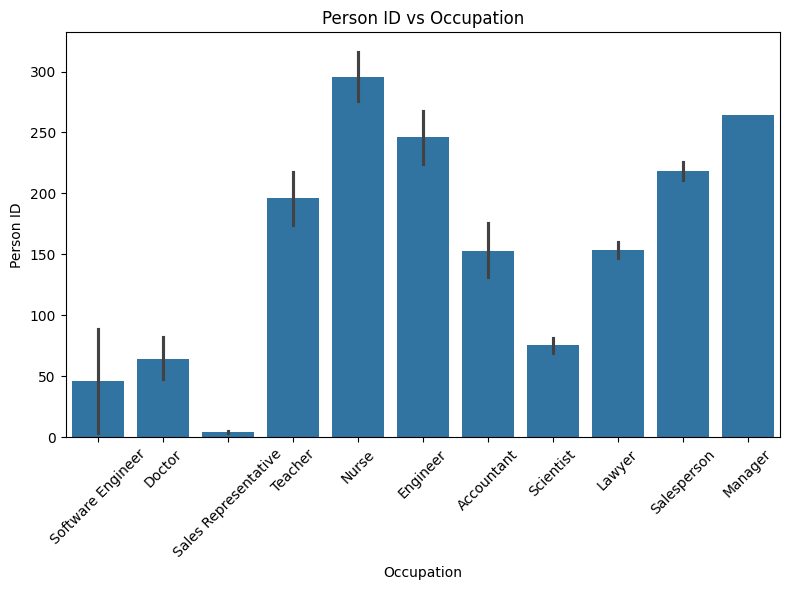

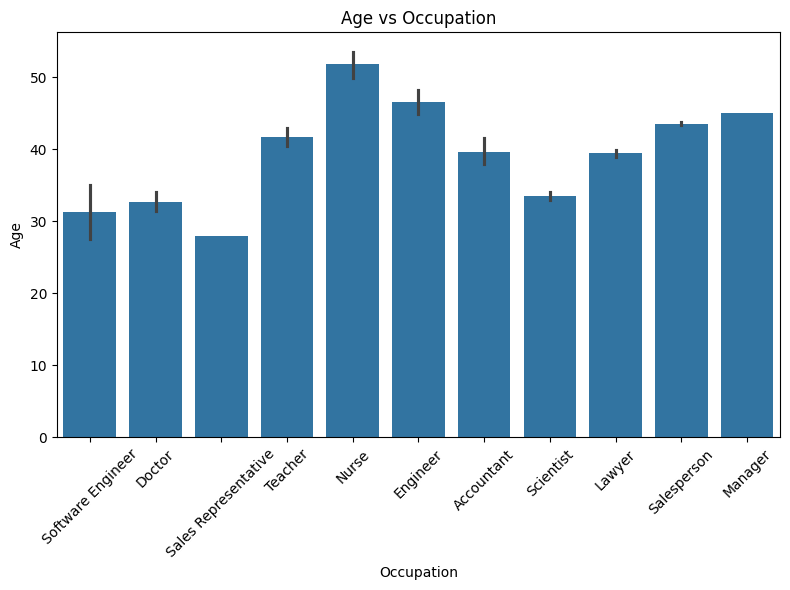

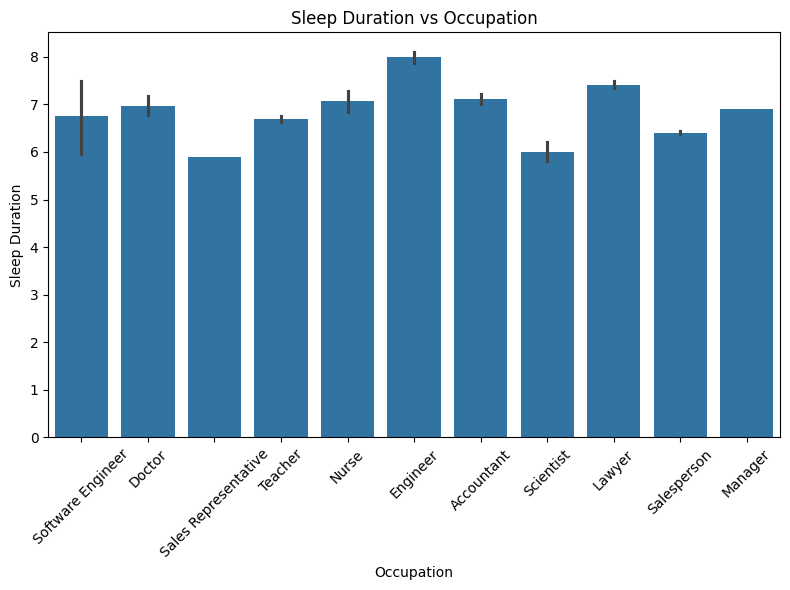

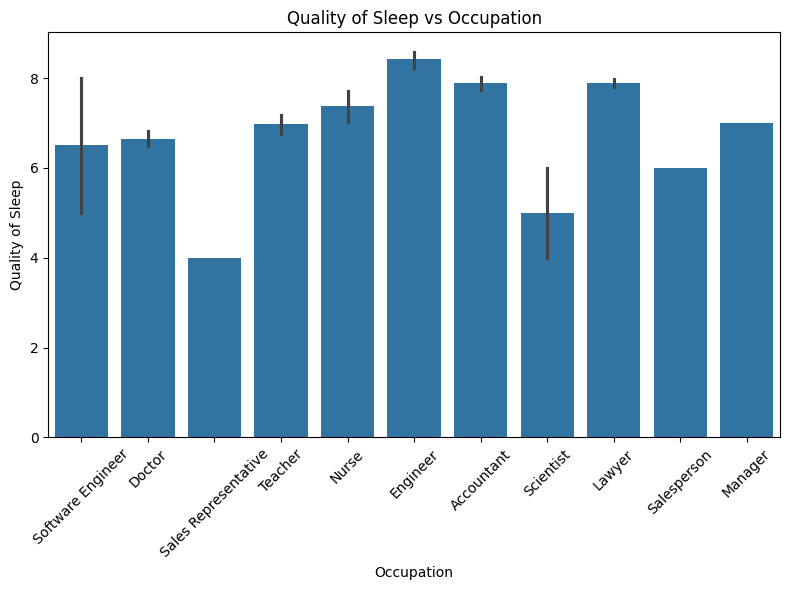

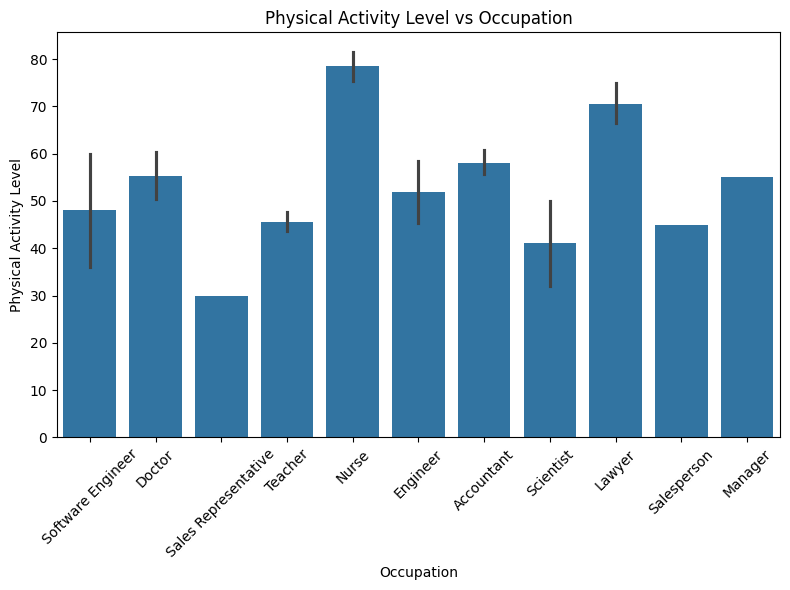

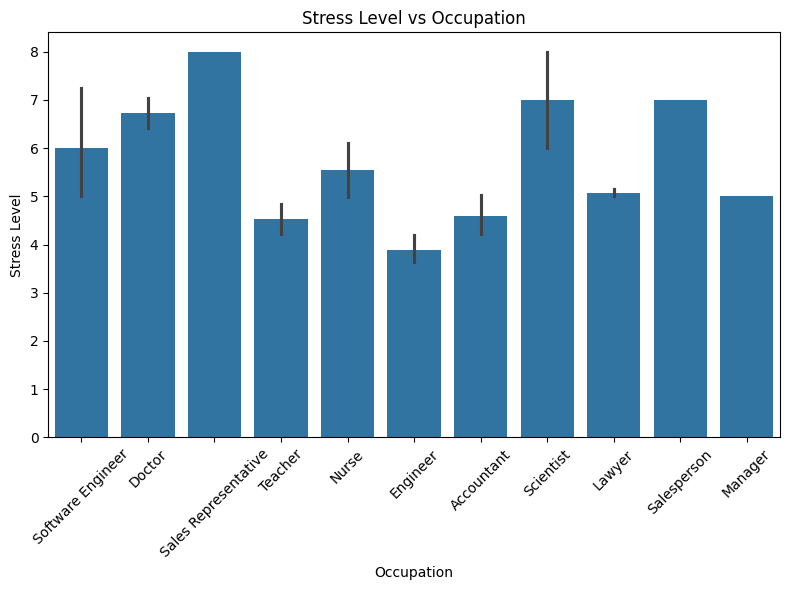

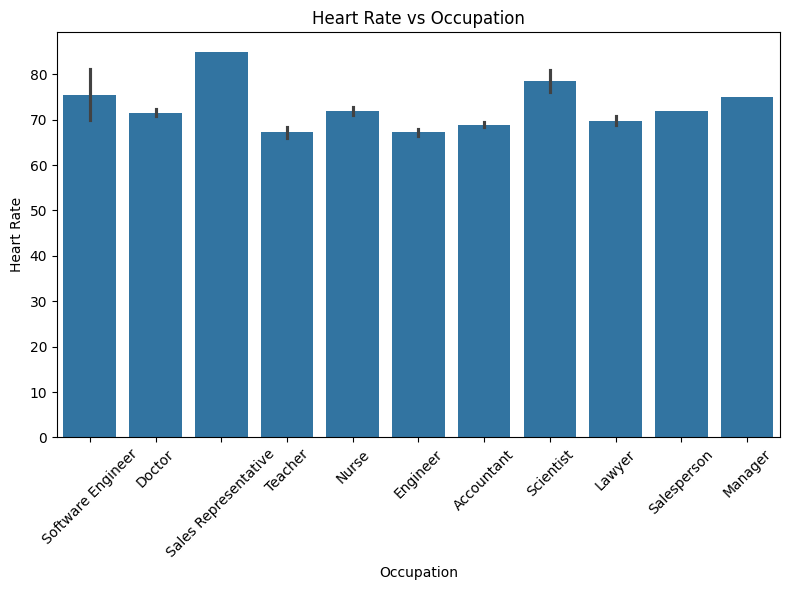

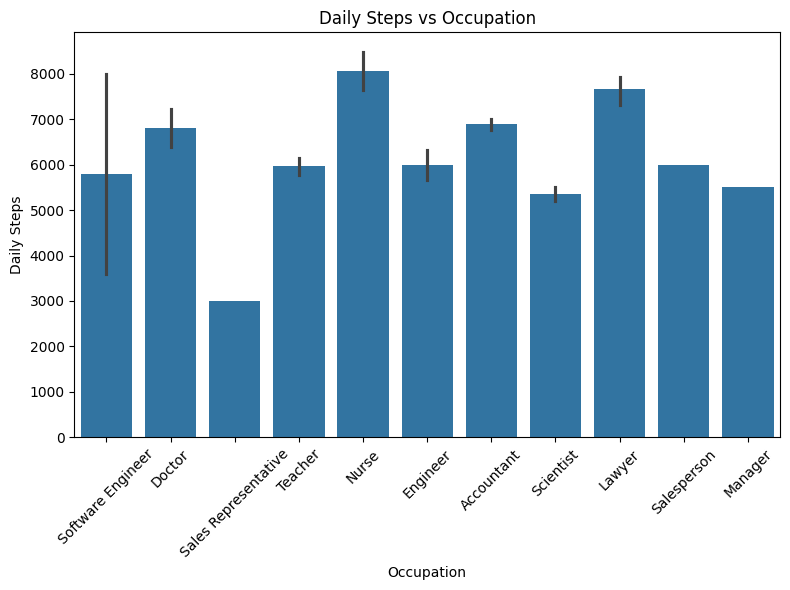

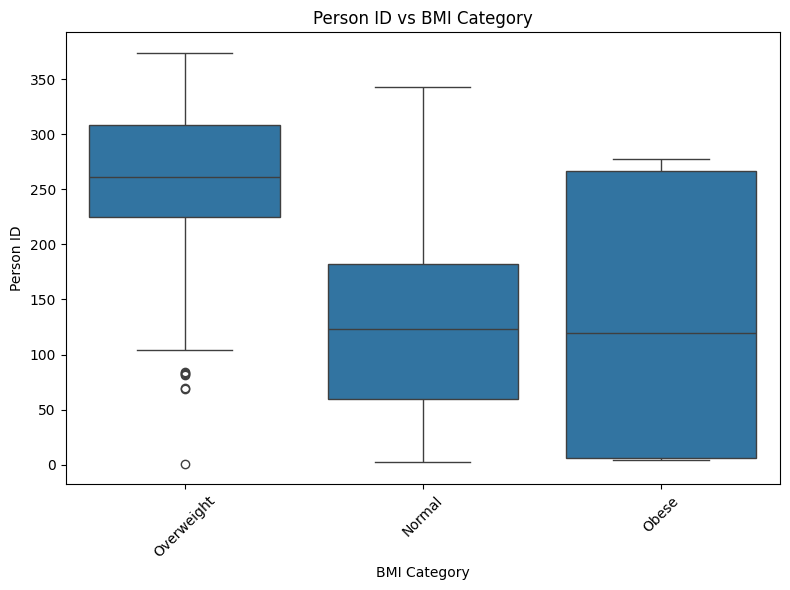

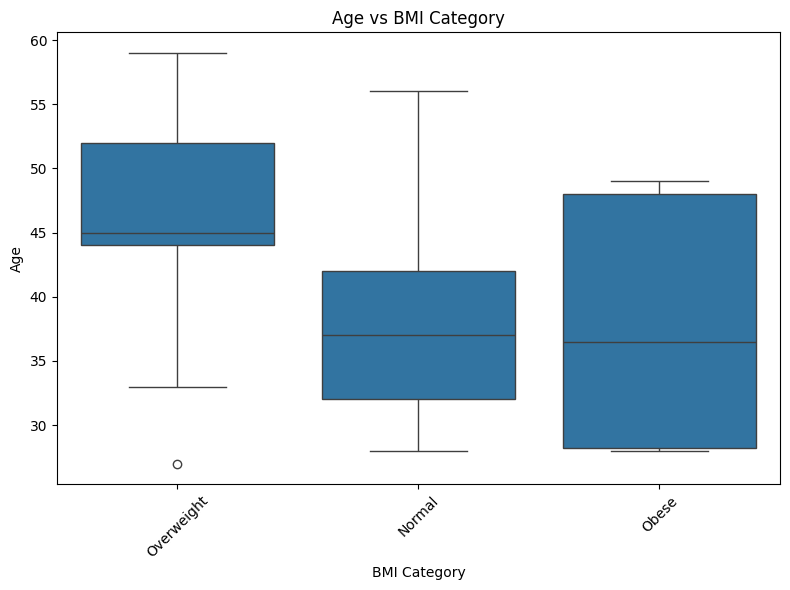

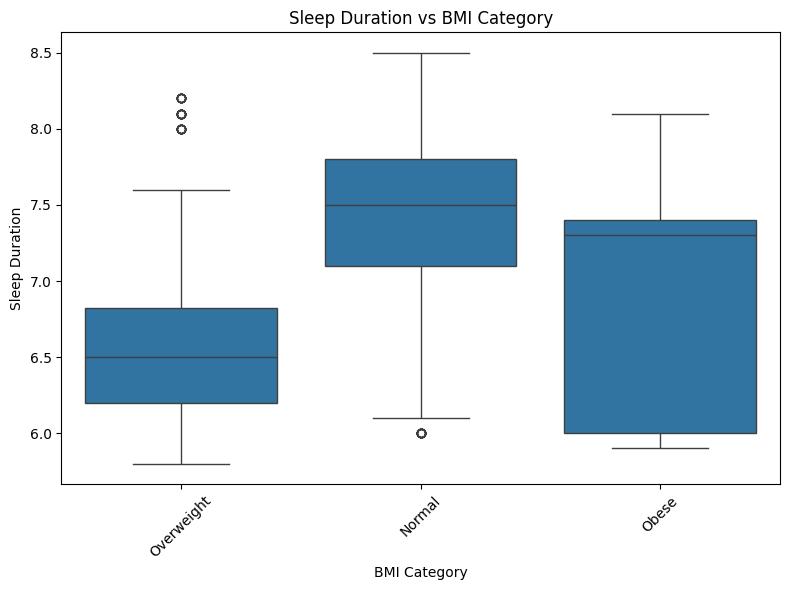

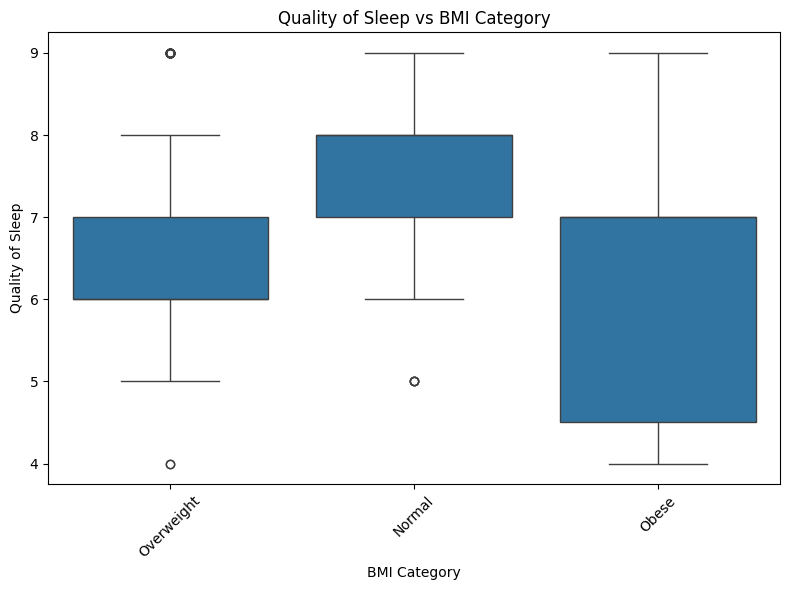

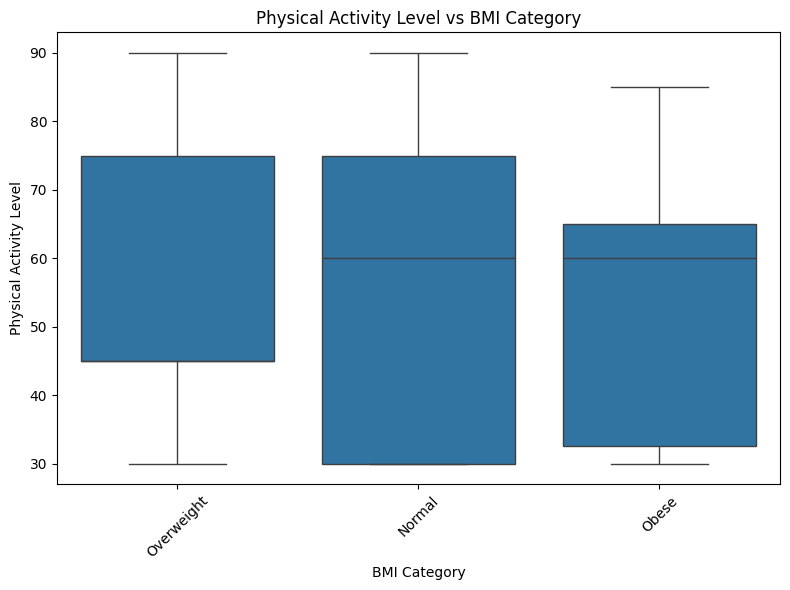

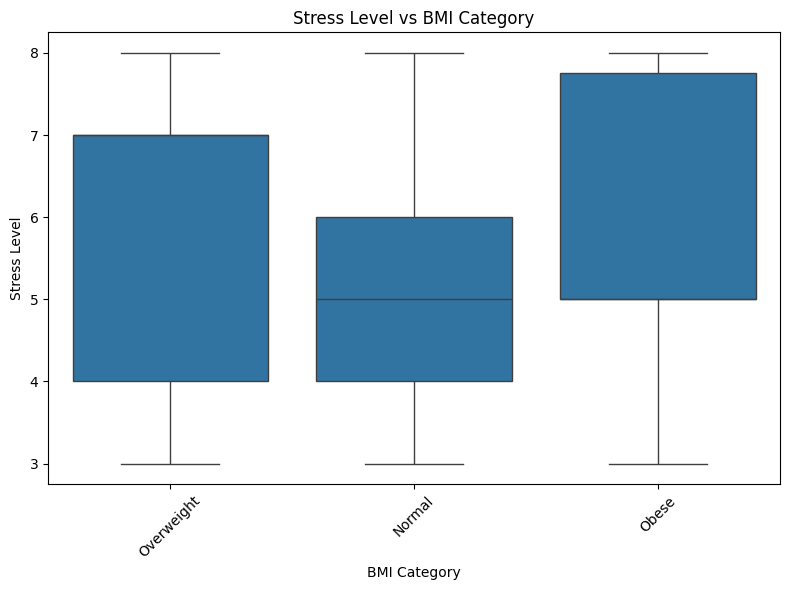

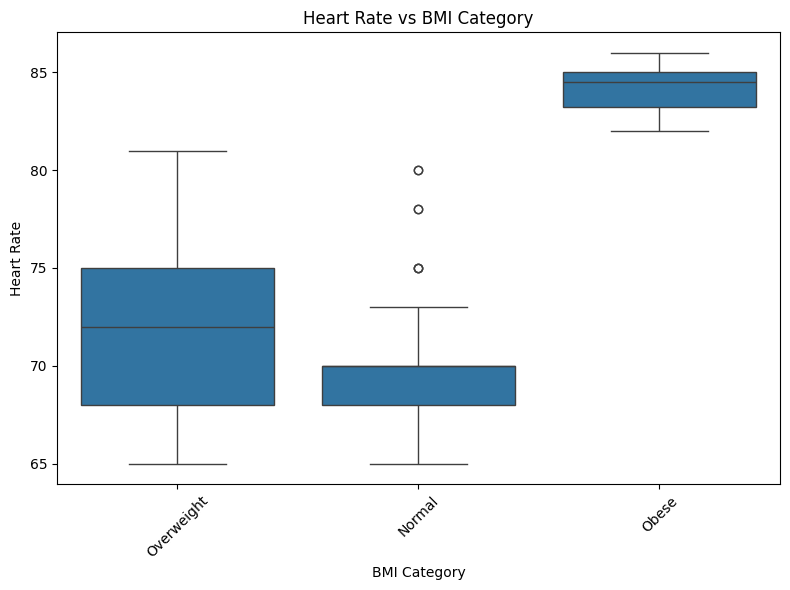

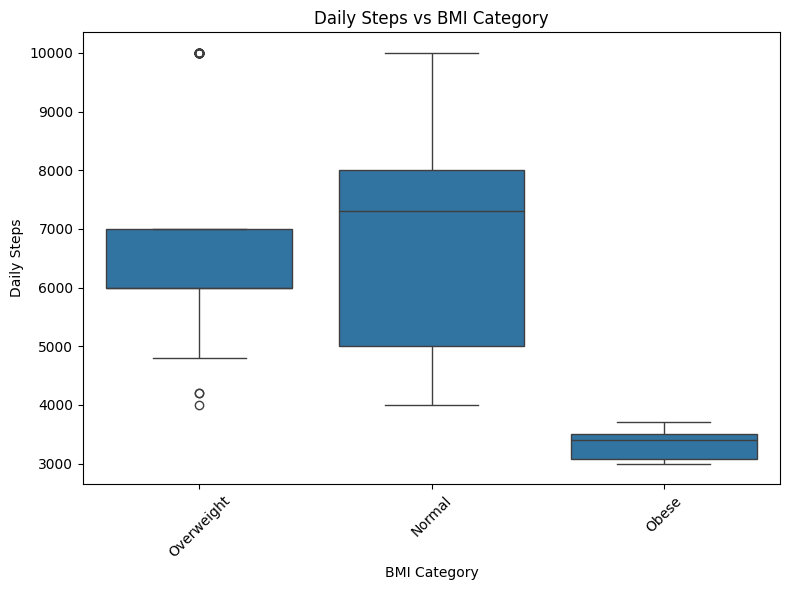

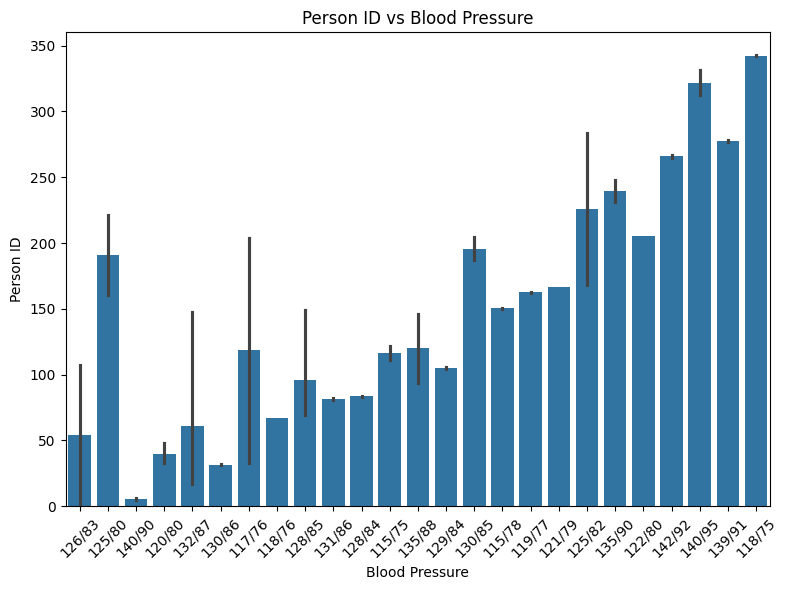

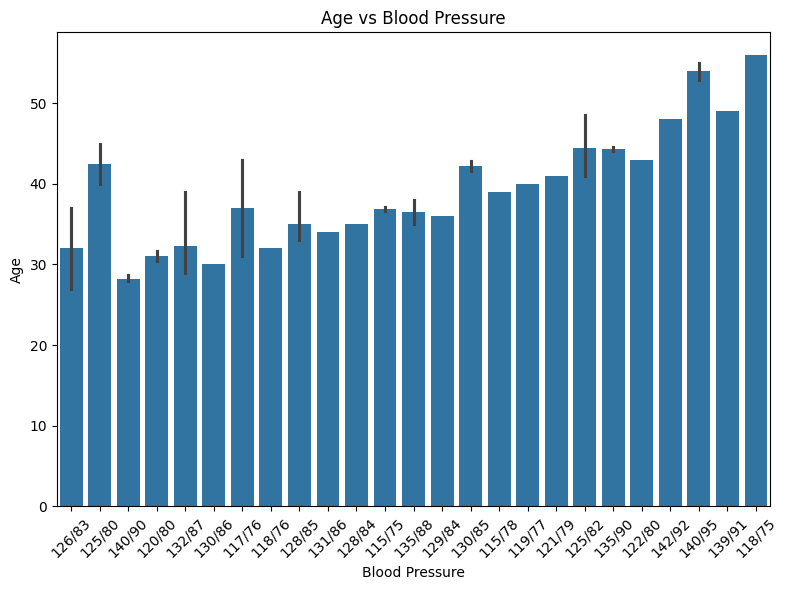

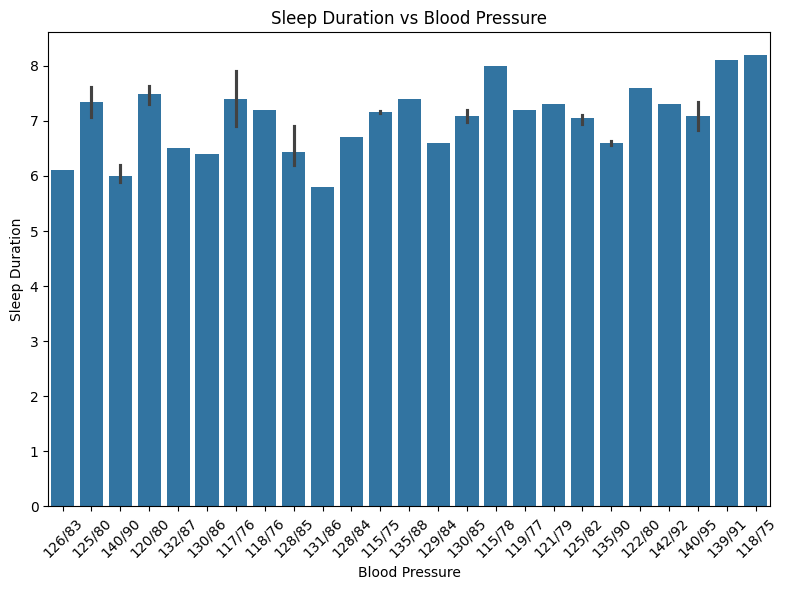

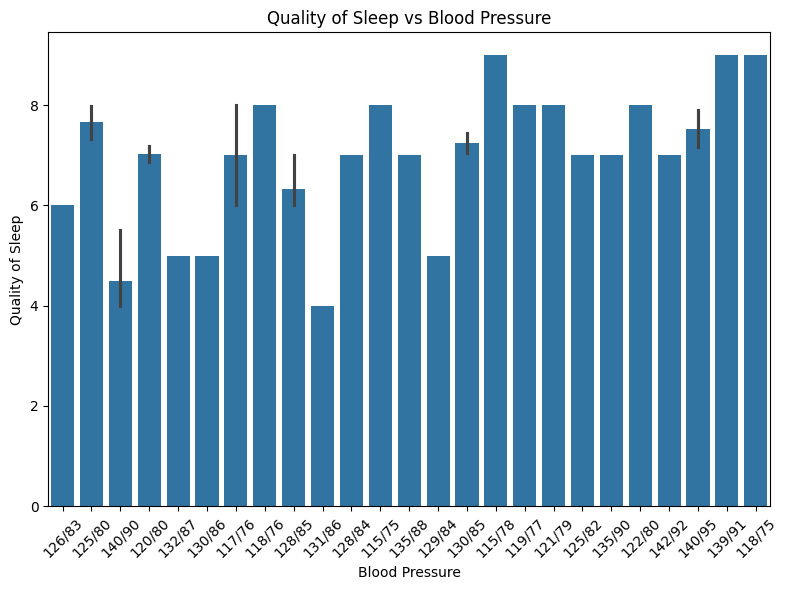

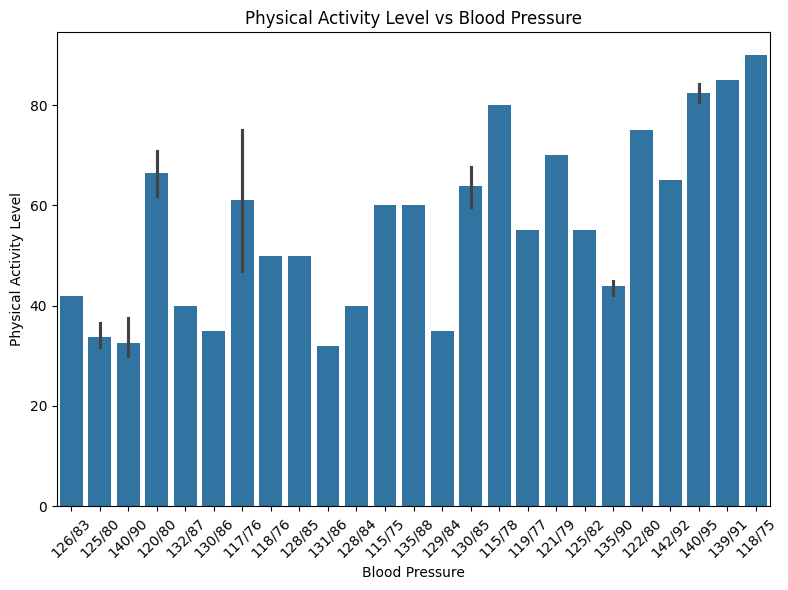

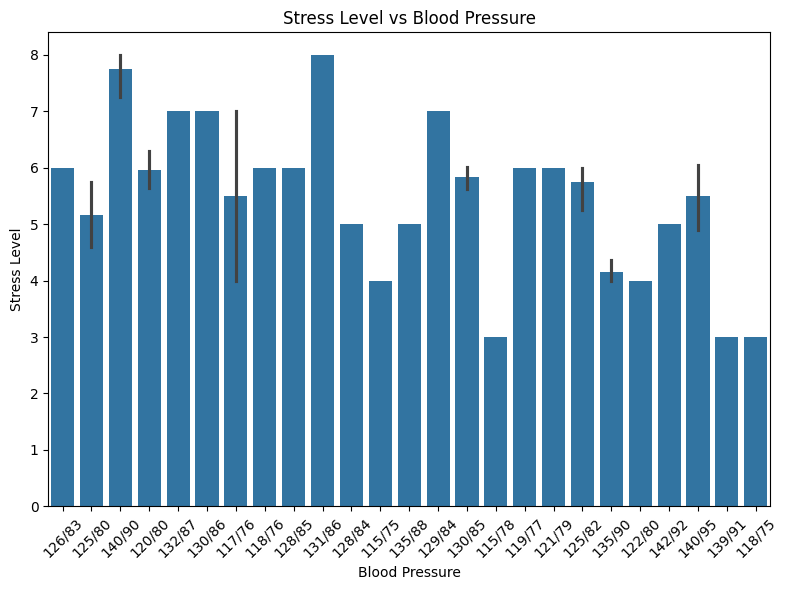

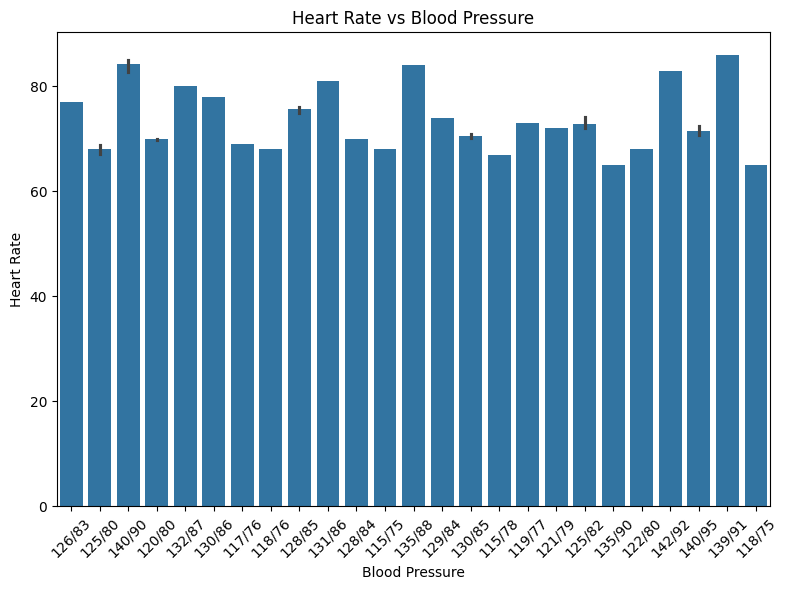

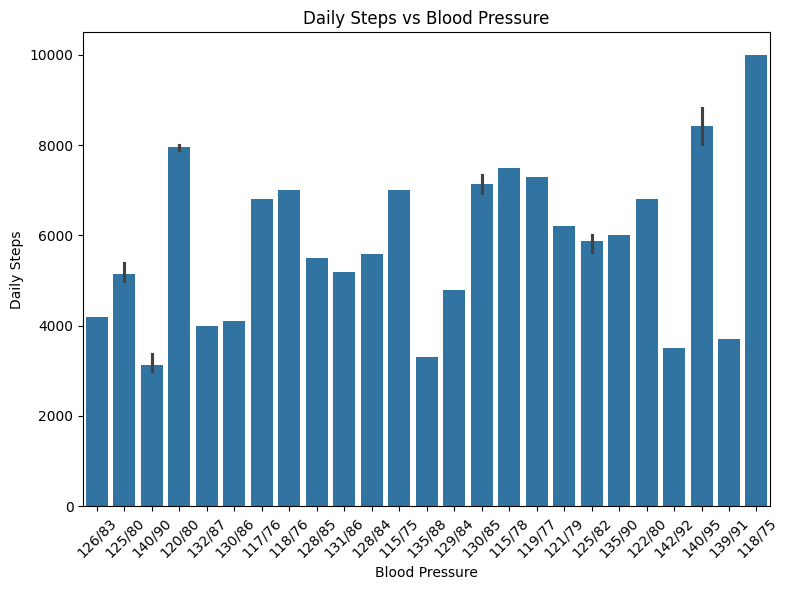

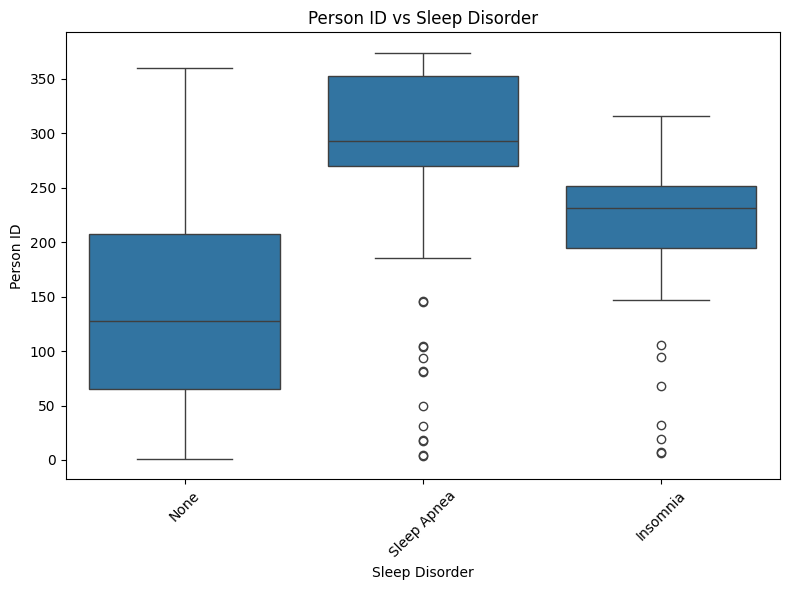

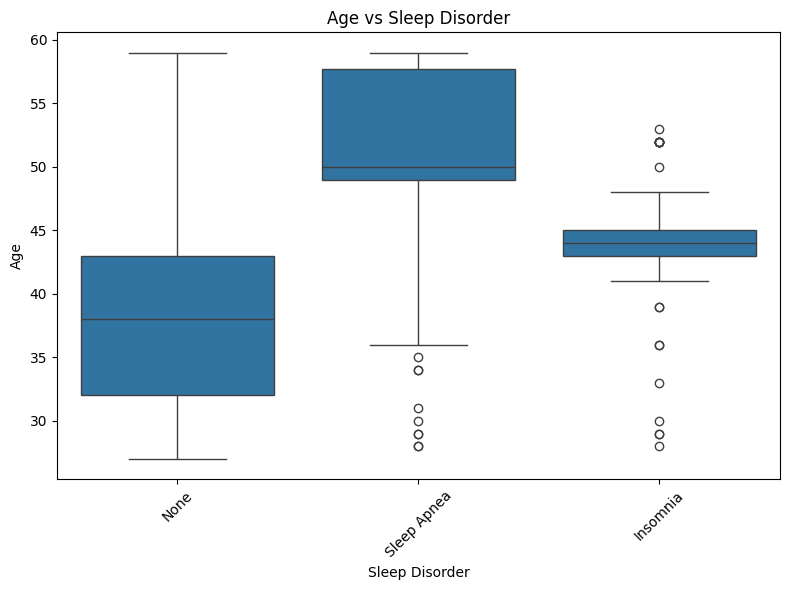

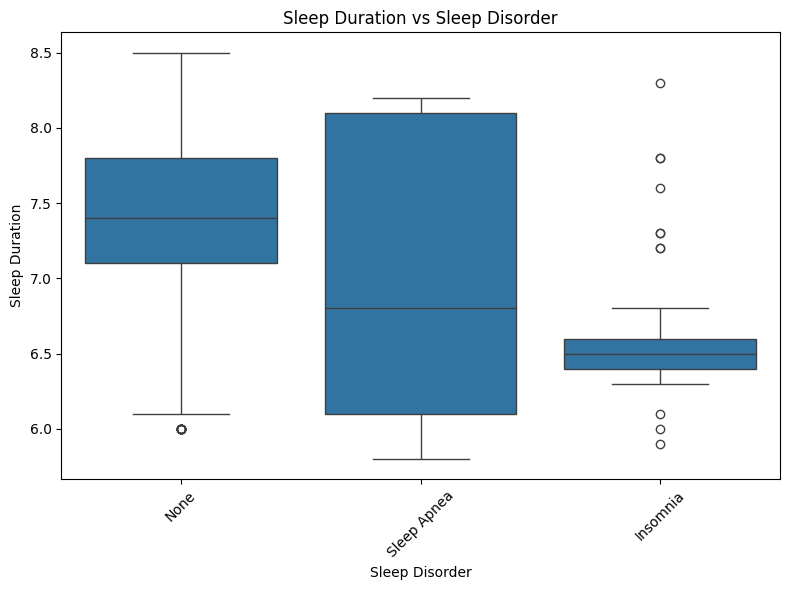

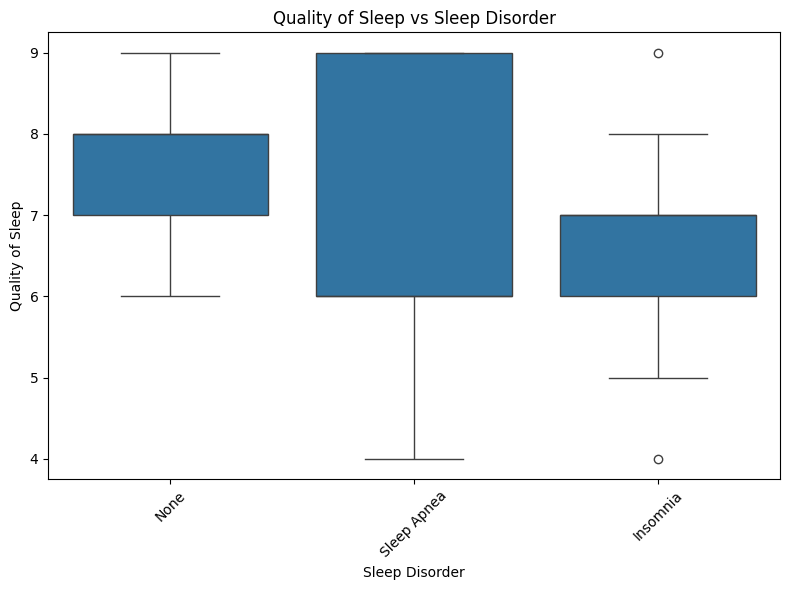

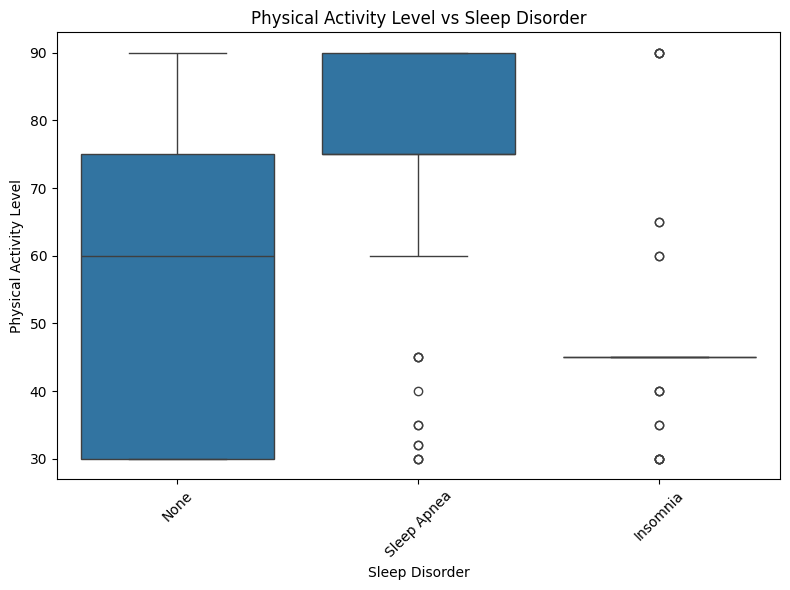

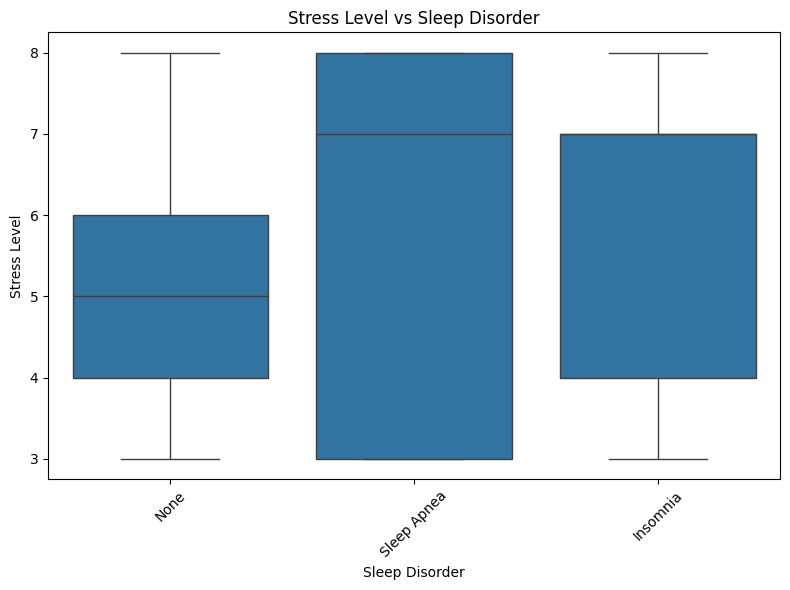

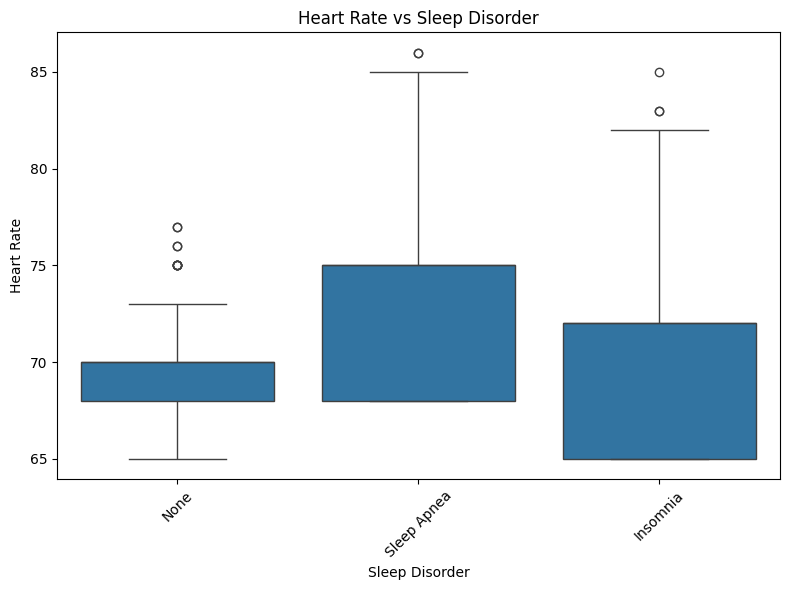

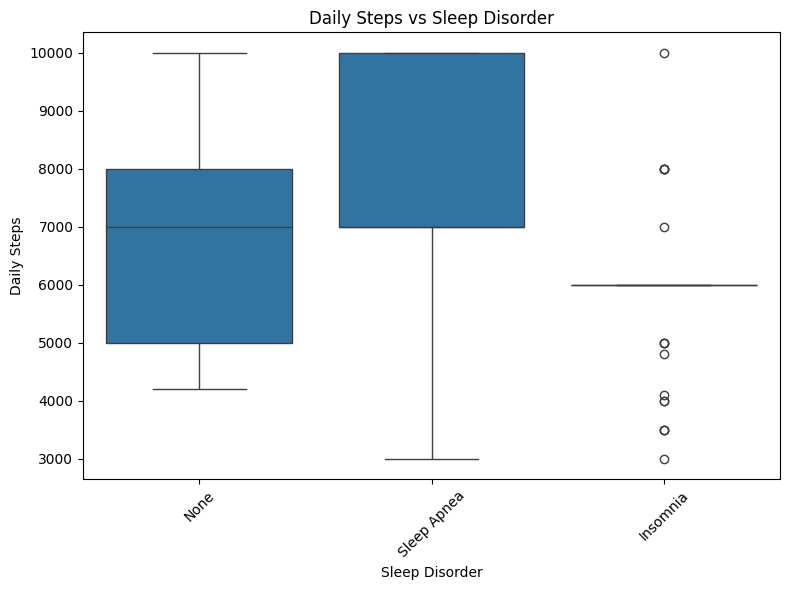

In [34]:
# Assuming cat_cols contains the names of categorical columns
# and num_cols contains the names of numerical columns
for cat_col in cat_cols:
    for num_col in num_cols:
        plt.figure(figsize=(8, 6))
        if len(sleep[cat_col].unique()) <= 5:
            sns.boxplot(x=cat_col, y=num_col, data=sleep)
        else:
            sns.barplot(x=cat_col, y=num_col, data=sleep)  # Choose appropriate estimator
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [36]:
num_cols

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

<Figure size 3000x2000 with 0 Axes>

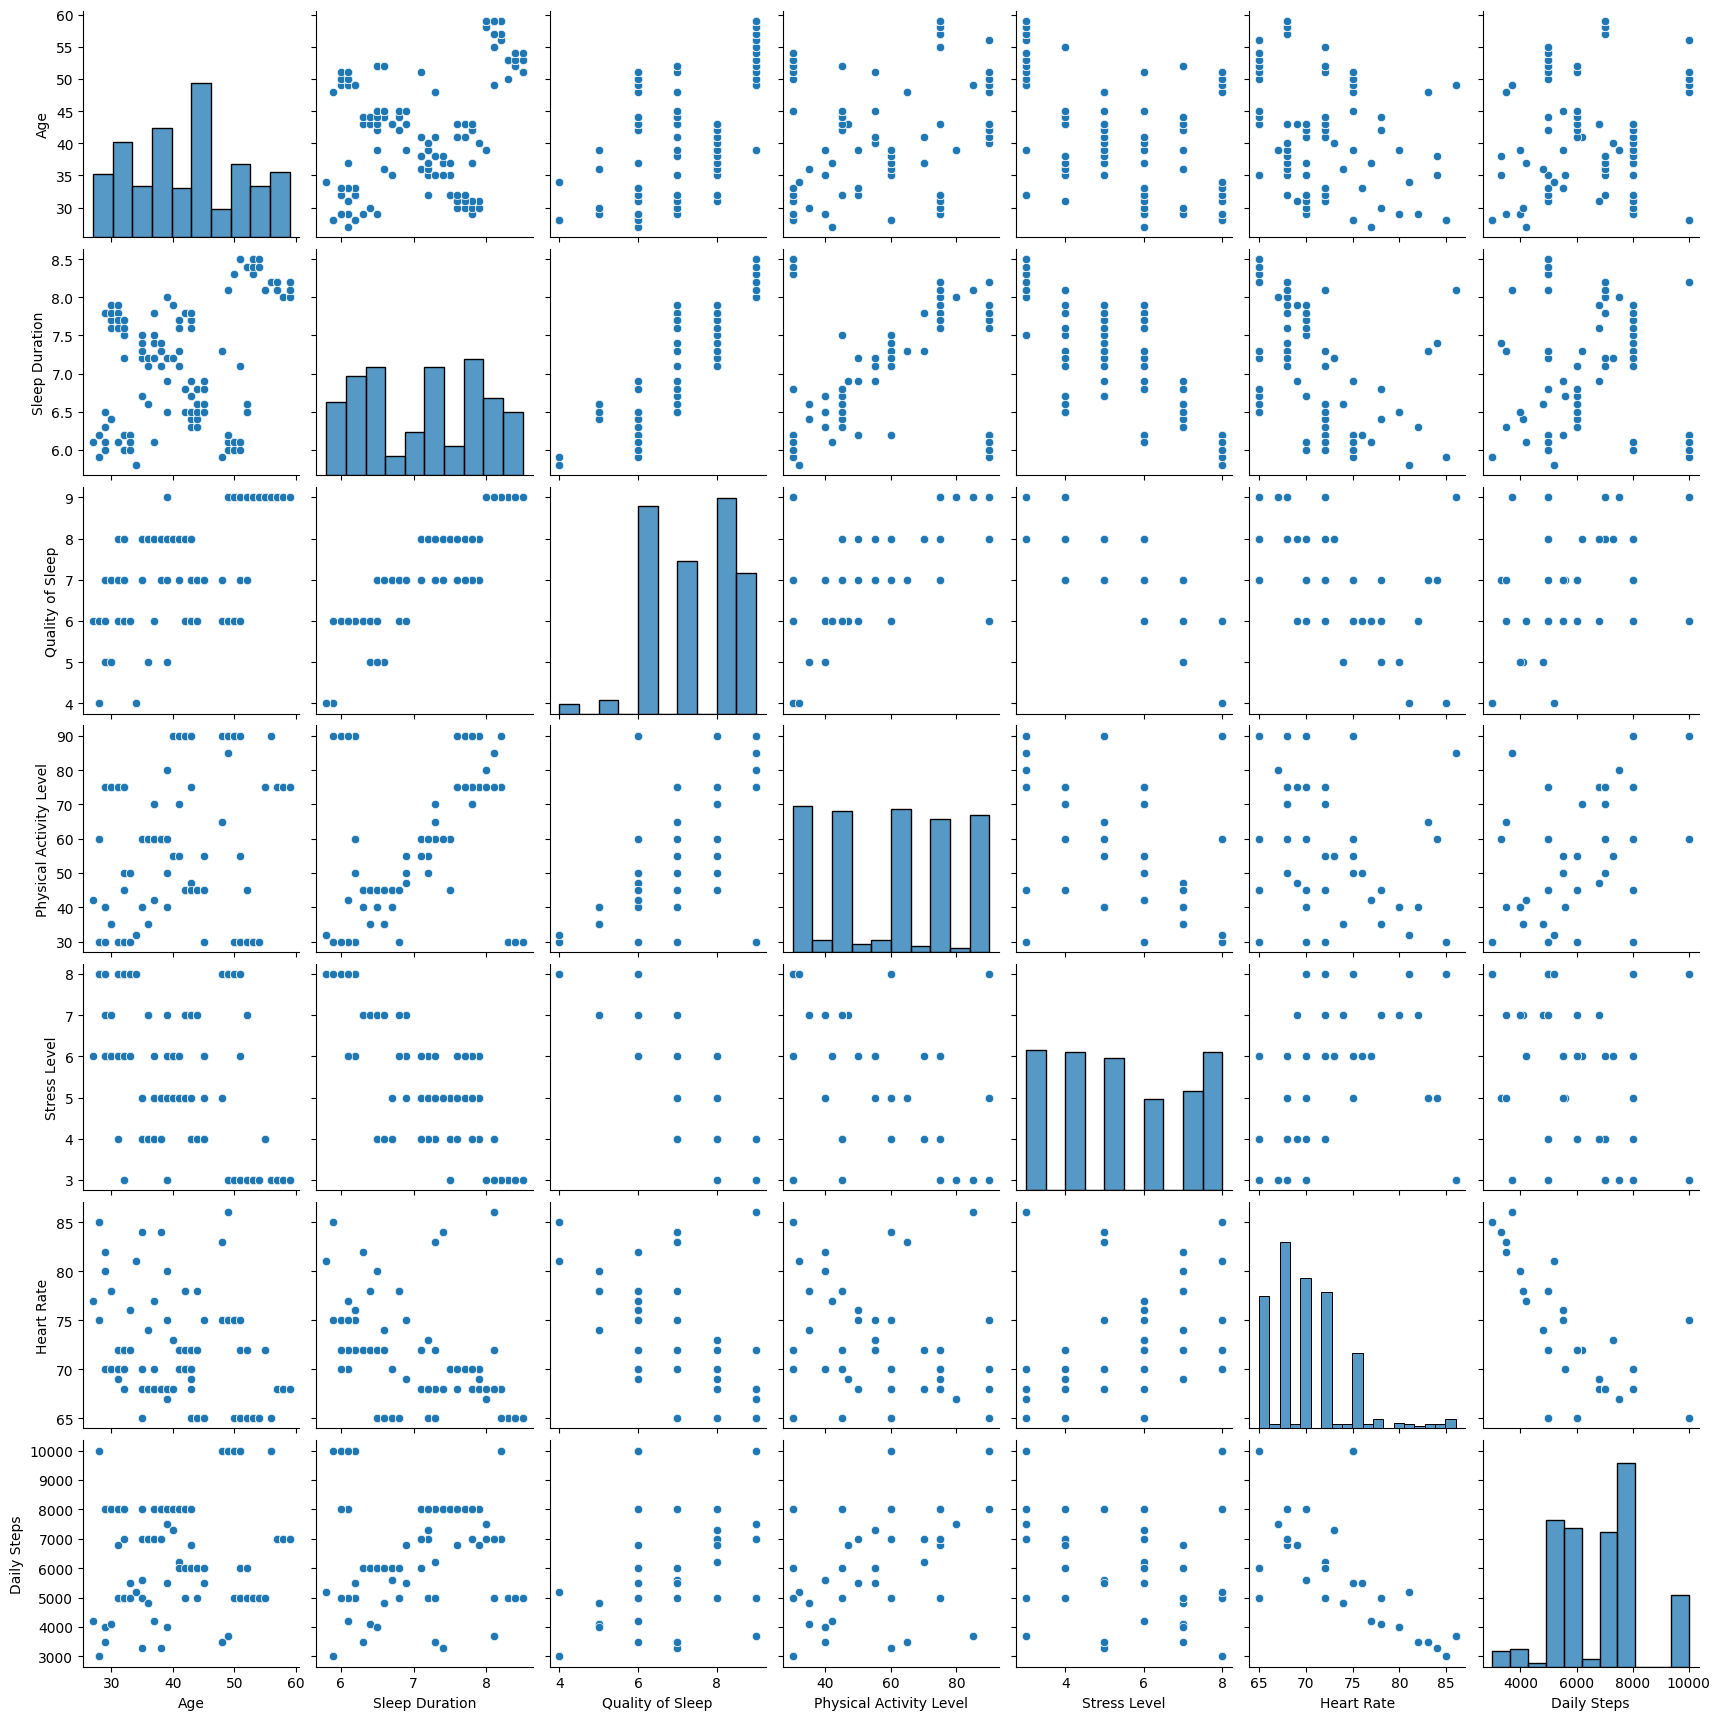

In [39]:
plt.figure(figsize=(30,20))
sns.pairplot(data=sleep,vars=['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps'])
plt.show()

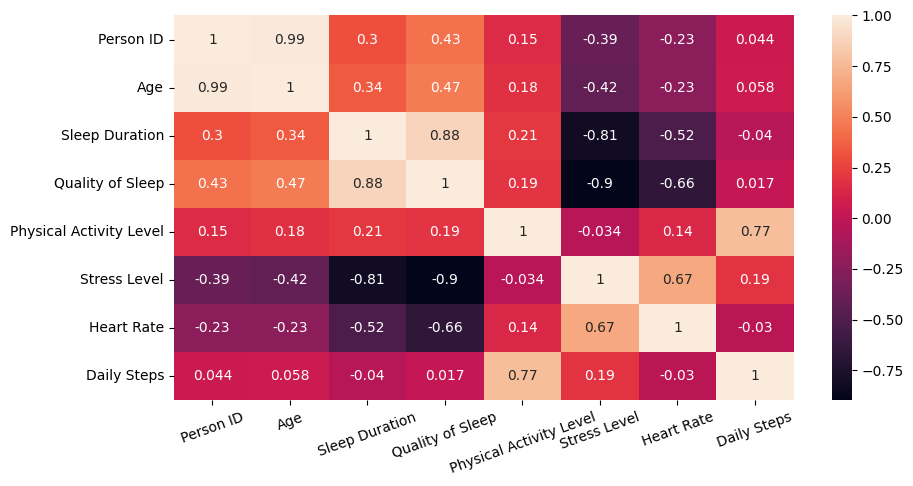

In [44]:
plt.figure(figsize=(10,5))
gph=sns.heatmap(sleep.corr(),annot=True)
gph.set_xticklabels(gph.get_xticklabels(), rotation=20)
plt.show()


**Which occupation has the lowest average sleep duration? **

In [51]:
sleep.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=True)

Occupation
Sales Representative    5.900000
Scientist               6.000000
Salesperson             6.403125
Teacher                 6.690000
Software Engineer       6.750000
Manager                 6.900000
Doctor                  6.970423
Nurse                   7.063014
Accountant              7.113514
Lawyer                  7.410638
Engineer                7.987302
Name: Sleep Duration, dtype: float64

In [81]:
sleep.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=True).index[0]

'Sales Representative'

**Which occupation has the lowest average sleep quality?**

In [49]:
sleep.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=True)

Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Teacher                 6.975000
Manager                 7.000000
Nurse                   7.369863
Accountant              7.891892
Lawyer                  7.893617
Engineer                8.412698
Name: Quality of Sleep, dtype: float64

In [82]:
sleep.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=True).index[0]

'Sales Representative'

**Let's explore how BMI Category can affect sleep disorder rates.**

In [64]:
insomnia_data= sleep[sleep['Sleep Disorder'] =='Insomnia']

In [66]:
insomnia_data['BMI Category'].value_counts()/len(insomnia_data) *100

Overweight    83.116883
Normal        11.688312
Obese          5.194805
Name: BMI Category, dtype: float64

In [74]:
insomnia_data.groupby('BMI Category')['Sleep Disorder'].count()

BMI Category
Normal         9
Obese          4
Overweight    64
Name: Sleep Disorder, dtype: int64

In [95]:
overweight_insomnia_ratio= insomnia_data['BMI Category'].value_counts()[0]/len(sleep[sleep['BMI Category'] =='Overweight']) *100


In [94]:
normal_insomnia_ratio=insomnia_data['BMI Category'].value_counts()[1]/len(sleep[sleep['BMI Category'] =='Normal']) *100

In [93]:
obese_insomnia_ratio=insomnia_data['BMI Category'].value_counts()[1]/len(sleep[sleep['BMI Category'] =='Obese']) *100 

In [91]:
# Create dictionary to store the ratios for each BMI category 
bmi_insomnia_ratios = {
    "Normal": round(normal_insomnia_ratio,2),  
    "Overweight": round(overweight_insomnia_ratio,2),
    "Obese": round(obese_insomnia_ratio,2) 
}

print(bmi_insomnia_ratios)

{'Normal': 4.17, 'Overweight': 43.24, 'Obese': 90.0}
